# Exploration des données sur les prêts prospères

## Aperçu de l'enquête

Dans cette enquête, nous voulions comprendre deux choses :

* Les facteurs qui peuvent être utilisés pour prédire le défaut de crédit.


* Quels facteurs influencent la note de prospérité.

## Aperçu de l'ensemble de données

Cet ensemble de données contient 113937 prêts avec 81 variables sur chaque prêt, pour les besoins de cette enquête, nous avons considérés les variables suivantes : Term, LoanStatus, BorrowerRate, ProsperRating (Alpha), ListingCategory (numeric), EmploymentStatus, DelinquenciesLast7Years, StatedMonthlyIncome, TotalProsperLoans , LoanOriginalAmount, LoanOriginationDate, Recommandations, Investisseurs.

In [1]:
# importer tous les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Lecture des données
df_loan = pd.read_csv('prosperLoanData.csv')

## Analyse

In [3]:
# Liste des colonnes de sorties pour l'analyse
columns_output =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

# Nouveau Jeu de données avec les colonnes à utiliser pour l'analyse
df_output = df_loan[columns_output]

# Suppression des données manquantes de la colonne ProsperRating
df_output = df_output.dropna(subset=['ProsperRating (Alpha)']).reset_index()

# Conversion du format de la colonne LoanOriginationDate
df_output['LoanOriginationDate'] = pd.to_datetime(df_output['LoanOriginationDate'])

# Remplacer les données manquantes de la colonne TotalProsperLoans par zéro
df_output['TotalProsperLoans'] = df_output['TotalProsperLoans'].fillna(0)

## Statut du prêt

**Constat 1 :**

* La plupart des prêts dans l'ensemble de données sont en fait des prêts en cours.


* Les prêts en souffrance sont divisés en plusieurs groupes en fonction de la durée du retard de paiement.


* L'autre grande partie est constituée de prêts achevés, les prêts en défaut compromettent une minorité, mais les prêts radiés compromettent également un montant substantiel.

Text(0.5, 1.0, 'Comptage des statuts des prêts')

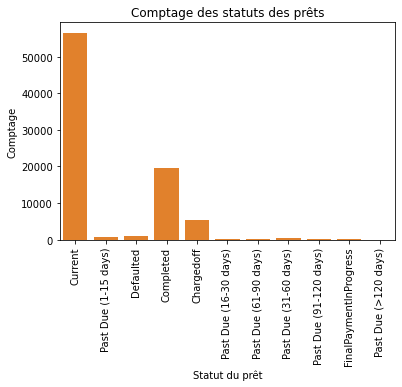

In [4]:
# Affichage le nombre d'observations dans chaque groupe catégoriel de la colonne LoanStatus
base_color = sns.color_palette()[1]
plt.xticks(rotation=90)
sns.countplot(data = df_output, x = 'LoanStatus', color = base_color);
plt.ylabel('Comptage')
plt.xlabel('Statut du prêt')
plt.title('Comptage des statuts des prêts')

## Statut d'emploi

**Constat 2 :**

* La majorité des emprunteurs sont employés et toutes les autres catégories représentent une petite partie des emprunteurs.


* En petit groupe, le temps plein est le plus élevé, après quoi les travailleurs indépendants sont là et ainsi de suite.

Text(0.5, 1.0, "Comptage des statuts d'emploi")

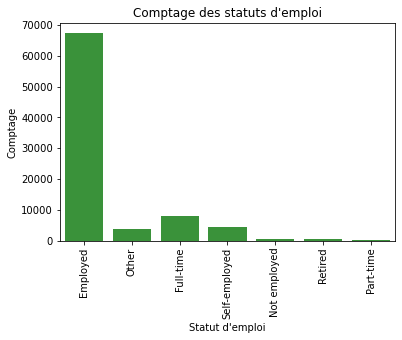

In [5]:
# Affichage le nombre d'observations dans chaque groupe catégoriel de la colonne EmploymentStatus
base_color = sns.color_palette()[2]
sns.countplot(data = df_output, x = 'EmploymentStatus', color = base_color);
plt.xticks(rotation = 90);
plt.ylabel('Comptage')
plt.xlabel("Statut d'emploi")
plt.title("Comptage des statuts d'emploi")

## Revenu mensuel déclaré

**Constat 3 :**

* Avec une limite de moyenne et 3 fois les écarts-types, la distribution du revenu mensuel a toujours un biais vers la droite notable, mais nous pouvons maintenant voir que le mode est d'environ 5000.

Text(0.5, 1.0, 'Distribution des revenus mensuels déclarés sans valeurs aberrantes')

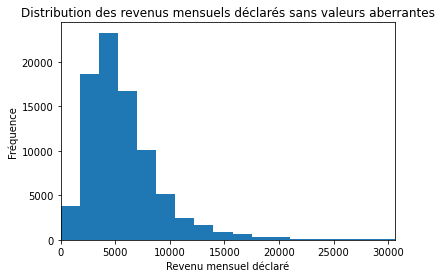

In [6]:
# Nombre de valeurs aberrantes
stated_monthly_income_std = df_output['StatedMonthlyIncome'].std()
stated_monthly_income_mean = df_output['StatedMonthlyIncome'].mean()
boundary = stated_monthly_income_mean + stated_monthly_income_std * 3

# Distribution de la colonne StatedMonthlyIncome sans valeurs aberrantes
plt.hist(data=df_output, x='StatedMonthlyIncome', bins=1000);
plt.xlim(0, boundary);
plt.ylabel('Fréquence')
plt.xlabel("Revenu mensuel déclaré")
plt.title("Distribution des revenus mensuels déclarés sans valeurs aberrantes")

In [7]:
# Ajustage de la forme des données
condition = (df_output['LoanStatus'] == 'Completed') | (df_output['LoanStatus'] == 'Defaulted') |\
                  (df_output['LoanStatus'] == 'Chargedoff')
df_output = df_output[condition]

def default_change(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
df_output['LoanStatus'] = df_output.apply(default_change, axis=1)

# Réduction du nombre de catégories
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categorie(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
df_output['ListingCategory (numeric)'] = df_output.apply(reduce_categorie, axis=1)

## Statut et note de prospérité

**Constat 1 :**

* La note la plus fréquente parmi les prêts en défaut est en fait "D".


* Et la note la plus fréquente parmi les terminés est également "D" et la deuxième plus élevée est "A" et ainsi de suite.

Text(0.5, 1.0, 'Comptage des statuts des prêts et note de prospérité (Alpha)')

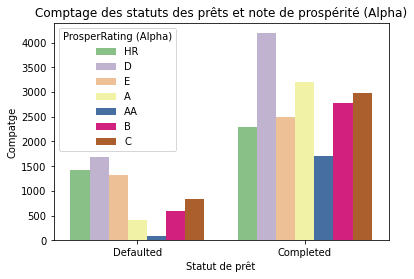

In [8]:
# Affichage le nombre d'observations dans chaque groupe catégoriel les colonnes LoanStatus et ProsperRating (Alpha)
sns.countplot(data = df_output, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Accent')
plt.ylabel('Compatge')
plt.xlabel("Statut de prêt")
plt.title("Comptage des statuts des prêts et note de prospérité (Alpha)")

## Début de Crédit avec la catégorie d'inscription

**Constat 2 :**

* Dans les deux graphiques, "consolidation de la dette" a la plus grande fréquence parmi tous.

Text(0.5, 1.0, 'Comptage des statuts des prêts et liste des categories (numeric)')

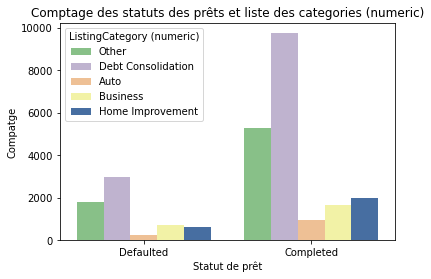

In [9]:
# Affichage le nombre d'observations dans chaque groupe catégoriel de la colonne LoanStatus et ListingCategory (numeric)
sns.countplot(data = df_output, x = 'LoanStatus', hue = 'ListingCategory (numeric)', palette = 'Accent')
plt.ylabel('Compatge')
plt.xlabel("Statut de prêt")
plt.title("Comptage des statuts des prêts et liste des categories (numeric)")

## Statut du prêt et montant du prêt

**Constat 3 :**

* À partir du graphique ci-dessus, nous pouvons affirmer que les "crédits en défaut" ont tendance à être plus petits que les "crédits terminés".

Text(0.5, 1.0, 'Montant du prêt en fonction du statut du prêt')

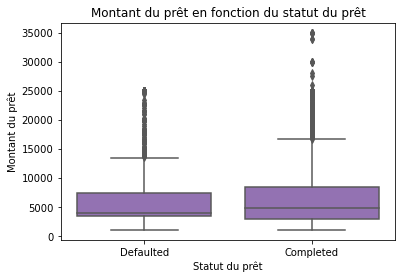

In [10]:
# Affichage du diagramme en boîte et moustaches pour la colonne LoanStatus
base_color = sns.color_palette()[4]
sns.boxplot(data = df_output, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color);
plt.xlabel('Statut du prêt')
plt.ylabel("Montant du prêt")
plt.title("Montant du prêt en fonction du statut du prêt")

### Note de prospérité et statut d'emploi

**Constat 4 :**

* Les côtes inférieures semblent avoir de plus grandes proportions de personnes ayant le statut d'emploi "Sans emploi", "Travailleur indépendant", "Retraité" et "Temps partiel".

Text(0.5, 1.0, "Comptage des Note de prospérité et statut d'emploi")

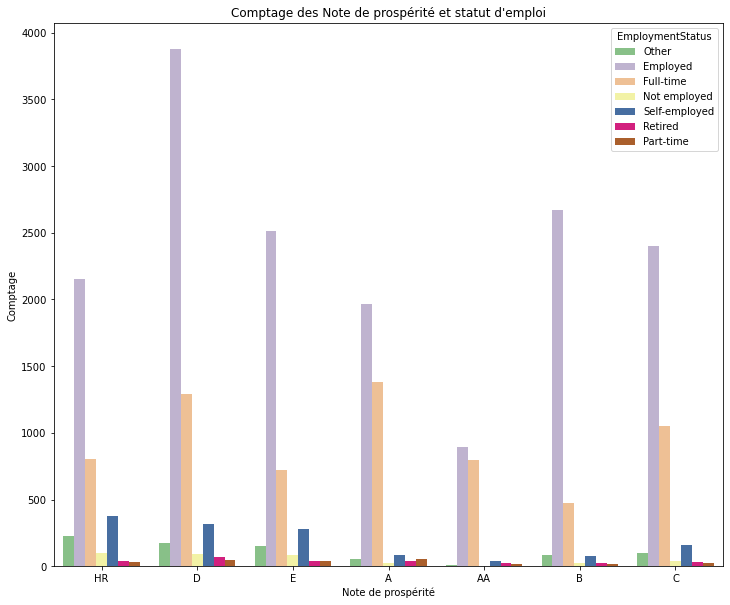

In [11]:
# Affichage le nombre d'observations dans chaque groupe catégoriel de la colonne ProsperRating (Alpha) et EmploymentStatus
plt.figure(figsize = [12, 10])
sns.countplot(data = df_output, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'Accent');
plt.ylabel('Comptage')
plt.xlabel("Note de prospérité")
plt.title("Comptage des Note de prospérité et statut d'emploi")

## Notation, montant du prêt et statut du prêt

**Constat 1 :**

* À l'exception des notes les plus basses, les crédits en défaut ont tendance à être plus importants que les crédits achevés.


* La plupart des crédits en défaut proviennent de personnes ayant une faible cote Prosper.

Text(0.5, 1.0, 'Montant du prêt et statut du prêt en fonction de la note de prospérité')

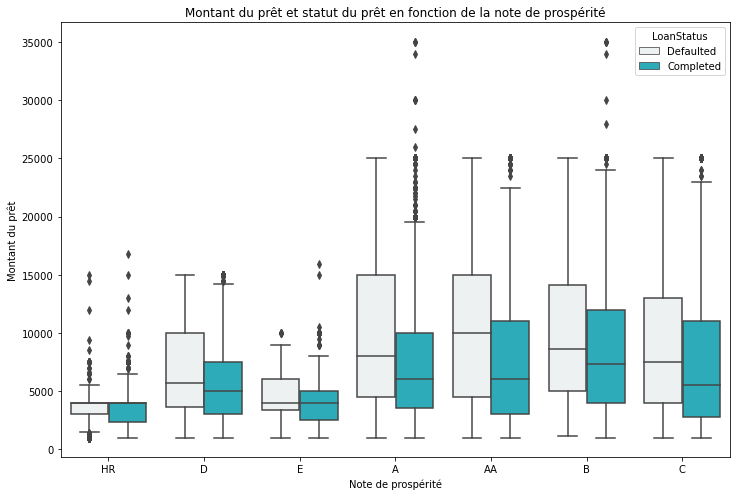

In [12]:
# Affichage du diagramme en boîte et moustaches pour la colonne ProsperRating 
base_color = sns.color_palette()[9]
plt.figure(figsize = [12, 8])
sns.boxplot(data=df_output, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus', color = base_color);
plt.ylabel('Montant du prêt')
plt.xlabel("Note de prospérité")
plt.title("Montant du prêt et statut du prêt en fonction de la note de prospérité")

## Relations entre la catégorie de crédit, la cote de crédit et le résultat du crédit

**Constat 2 :**

* Il y a 5 graphiques dans le second qui ont beaucoup de hauts et de bas autres que tous.


* Il n'y a pas de différence substantielle pour les taux de défaut dans les différentes catégories ventilées par notation.

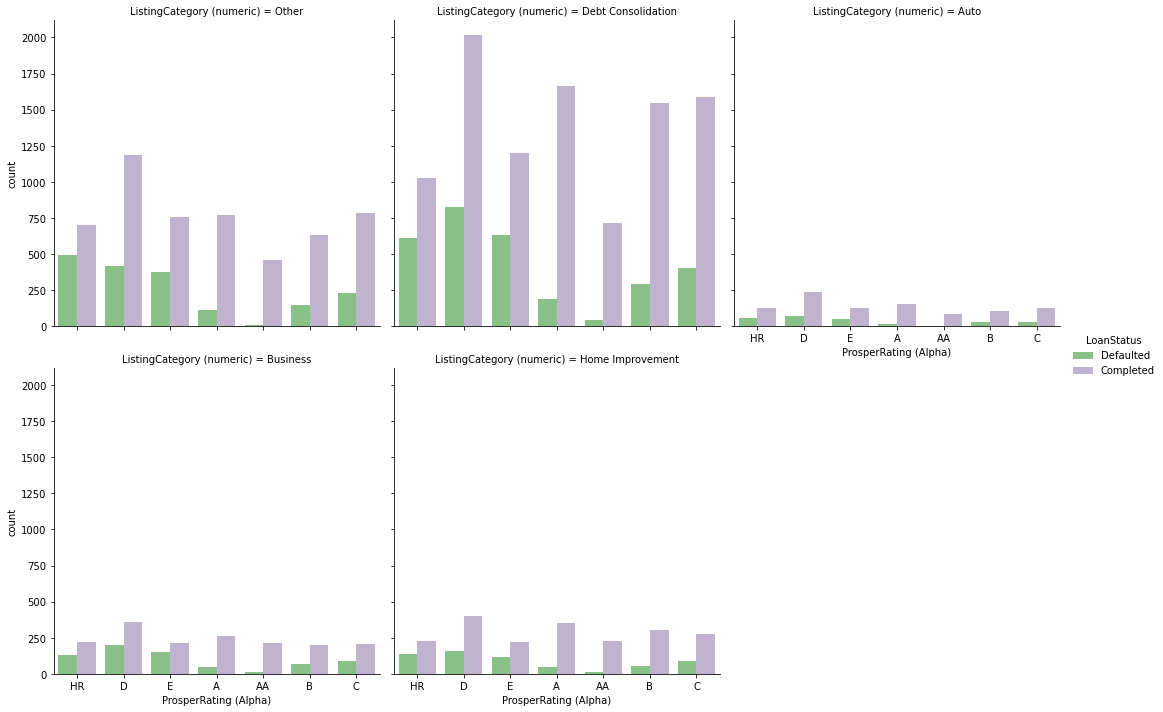

In [13]:
# Diagrammes pour illustrer la relation entre les colonnes ProsperRating, LoanStatus et ListingCategory
sns.catplot(x = 'ProsperRating (Alpha)', hue = 'LoanStatus', col = 'ListingCategory (numeric)',
              data = df_output, kind = 'count', palette = 'Accent', col_wrap = 3);

## Relations entre Montant de prêt, catégorie de prêt et statut du prêt 

**Constat 3 :**

* À l'exception de l'automobile, les entreprises et l'amélioration de l'habitat n'ont pas une moyenne presque égale entre eux.


* La catégorie d'entreprise a tendance à avoir un montant plus élevé.

Text(0.5, 1.0, 'Montant du prêt et statut du prêt en fonction de la categorie de prêt')

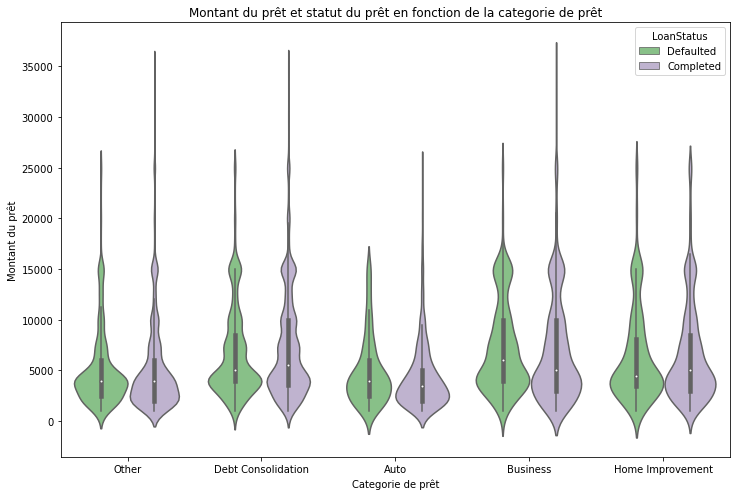

In [14]:
# Diagramme pour présenter les interactions entre les colonnes ListingCategory, LoanStatus et LoanOriginalAmount
plt.figure(figsize = [12, 8])
sns.violinplot(data=df_output, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus', palette = 'Accent');
plt.ylabel('Montant du prêt')
plt.xlabel("Categorie de prêt")
plt.title("Montant du prêt et statut du prêt en fonction de la categorie de prêt")